# Import Libraries

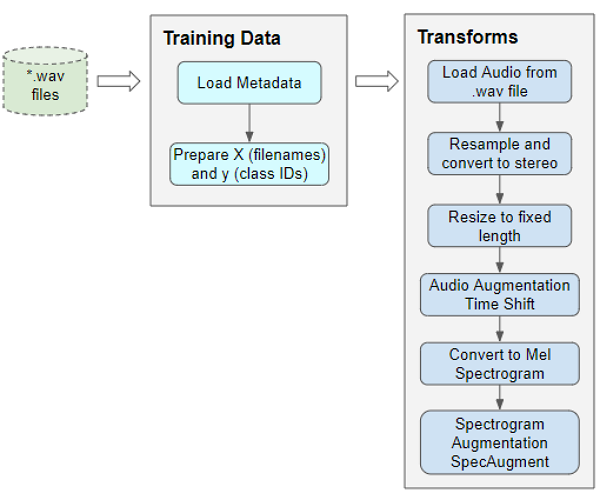

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import logging


sns.set_theme()

In [2]:
module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")

if module_path not in sys.path:
    sys.path.append(module_path+"\\model")



logging.basicConfig(filename='../logs/notebook.log', filemode='w', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',level=logging.INFO)

In [3]:
#we import our module script that we shall be using for preprocessing
logging.info(" ===== Loading created scripts ===== ")
try:    
    import audio
    logging.info(" ==== Succefully Loaded the Modules ===== ")
    print(" ===== Succefully loaded modules, modules are now ready to use ===== ")
except ImportError as error:
    
    logging.info(" !!!! Import Error  !!!! ")
    print(" !!!! The system ran into an Import Error \n ")
    print(error.__class__.__name__ + ": " + error.message)
    

 ===== Succefully loaded modules, modules are now ready to use ===== 


In [4]:
#we read the data
try:
    print("===== Reading Dataset ===== \n ")
    logging.info("====== Redaing Dataset ====== ")
    data=pd.read_csv('../data/merged_data.csv')
    print(" ==== Successfuly read dataset ===== \n")
except FileNotFoundError as e:
        
    logging.info(" !!!! File Not Found Error  !!!! ")
    print(" !!!! The system ran into a File Not Found Erro !!! \n ")
    print(error.__class__.__name__ + ": " + error.message)
    

===== Reading Dataset ===== 
 
 ==== Successfuly read dataset ===== 



In [5]:
#drop the unwanted columns
data.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
data

,Location,text,length
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,51
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,66
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,59
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,47
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,kule abidjan raia wa jiji hilo,30
...,...,...,...
10174,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,na somo lile lililopokelewa kule kenya,38
10175,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ambapo mtu aliyeshindwa kwenye uchaguzi,39
10176,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ni kauli yake mchambuzi wa masuala ya siasa,43
10177,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,mwanasheria anayemtetea rais wa zamani wa liberia,49


In [6]:
#we create a function to add the root folder to the location of each wav file to make a complete path
location_directory=r'..\data\alldata'

def add_root(x):
    x=os.path.join(location_directory,x)
    
    return x

data['Location']=data['Location'].apply(lambda x:add_root(x) )

data
    


,Location,text,length
0,..\data\alldata\SWH-05-20101106_16k-emission_s...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,51
1,..\data\alldata\SWH-05-20101106_16k-emission_s...,inayokutangazia moja kwa moja kutoka jijini da...,66
2,..\data\alldata\SWH-05-20101106_16k-emission_s...,juma hili bara la afrika limeshuhudia raia wa ...,59
3,..\data\alldata\SWH-05-20101106_16k-emission_s...,wakipiga kura ya maoni ilikufanya mabadiliko ya,47
4,..\data\alldata\SWH-05-20101106_16k-emission_s...,kule abidjan raia wa jiji hilo,30
...,...,...,...
10174,..\data\alldata\SWH-15-20110310_16k-emission_s...,na somo lile lililopokelewa kule kenya,38
10175,..\data\alldata\SWH-15-20110310_16k-emission_s...,ambapo mtu aliyeshindwa kwenye uchaguzi,39
10176,..\data\alldata\SWH-15-20110310_16k-emission_s...,ni kauli yake mchambuzi wa masuala ya siasa,43
10177,..\data\alldata\SWH-15-20110310_16k-emission_s...,mwanasheria anayemtetea rais wa zamani wa liberia,49


In [7]:
# import librosa
# import librosa.display
# audio, rate= librosa.load(data['Location'][0])
# plt.figure(figsize=(20, 5))
# librosa.display.waveplot(audio, sr=44100)

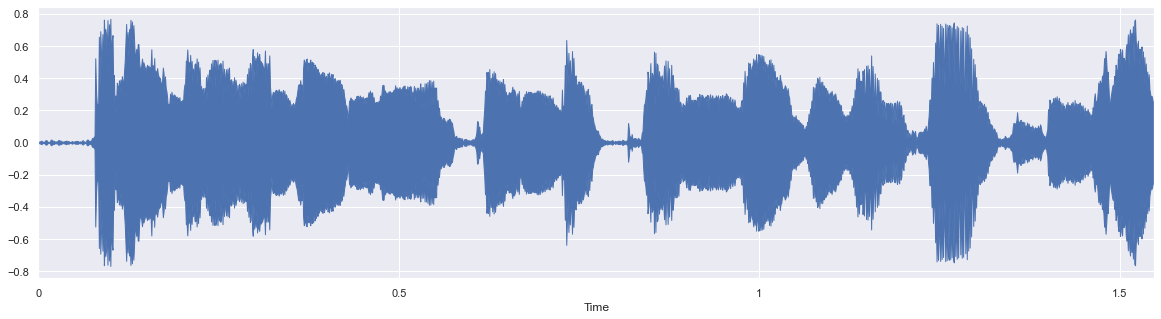

In [8]:
#call the plot wav function from the audio script to plot a sample wav file
audio.plot_wav(data['Location'][0],44100)

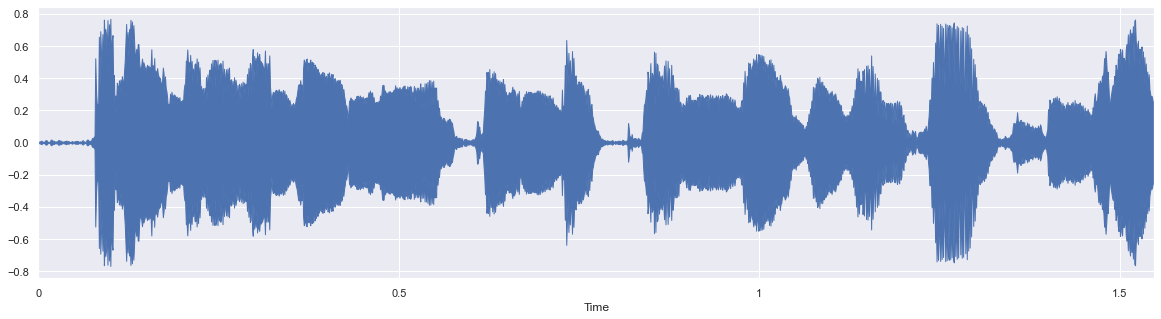

In [9]:
audio.sample_audio_play(data['Location'][0],44100)

In [10]:
#we call the ipython function to confirm our audio and text are correct 
import IPython.display as ipd
ipd.Audio(data['Location'][0],rate=44100)

## Conversion from Mono to Stero 

In [13]:
#
data['Resampled']=data['Location'].apply(lambda x: audio.make_stereo(x))
    

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49600, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=58400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=62400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=47040, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39680, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43840, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=50720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=74880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38558, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39201, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=66240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37121, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=53760, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43679, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51680, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49280, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=52000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=76800, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=47200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=98240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=69600, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40320, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35839, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=58880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=57440, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=66081, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39360, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=86880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=50560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=72960, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=57759, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36000, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=64640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=71679, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49121, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37921, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=58560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=55681, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=83361, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43200, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=52961, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=34720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=61440, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37600, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36320, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=45121, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=65440, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=47679, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=60320, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35361, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=46720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=72480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=62720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43039, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=85441, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=71521, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=47679, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=69441, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35679, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=58720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43201, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=59679, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=68960, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=47360, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41760, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=76320, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=93120, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=85920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=47679, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=81280, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36320, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=88640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39040, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44960, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=45440, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=66240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51519, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=34560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=66720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=54080, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=67201, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=46880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=92480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40800, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44640, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56638, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=42240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51521, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51041, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48318, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49599, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39201, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=88642, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38876, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51841, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51201, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48162, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=61759, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=96642, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=66560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43837, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56959, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=66720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=74880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=94080, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=63837, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=96478, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=42560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35521, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=46080, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=97439, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=42240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35361, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40322, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=34880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=74560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43521, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=63201, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=82080, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=45280, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=66400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=42240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=54560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=42720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=59040, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=75520, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=96320, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35201, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=91199, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=52000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=96800, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41439, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=79841, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=62080, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37920, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=46559, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=87041, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=92161, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=69920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=52001, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40320, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=77920, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=45441, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=64160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=91201, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=65920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=71840, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=65280, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=71679, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=55839, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=62240, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49441, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=77441, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39199, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=53440, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=68640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40800, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36800, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=45280, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=87360, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=58400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=85440, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43360, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41760, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48480, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=59519, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=65439, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=45281, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41121, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41440, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=73600, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37120, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=76320, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=72160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=67040, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=77920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=86880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=63200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37599, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=47839, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=88480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=71839, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56160, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=46560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=34560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=55041, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41121, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=34718, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=92000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=59360, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35520, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=73920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=47680, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39680, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=79680, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=82240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=60160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56480, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=55200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=50560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=80001, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37440, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40960, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=53760, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39360, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=91360, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=65281, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=54880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=72640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=58720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43679, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37599, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40640, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43840, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49440, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=86720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35840, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=72960, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=50400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39040, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40160, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=46880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=60480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=64960, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=88800, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=65920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=54720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=60000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=70880, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=84160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=84001, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=96960, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=91679, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40162, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39039, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=62240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=91840, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=42240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=77280, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=45920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=81920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=55360, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=45440, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37760, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41760, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36800, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=75840, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=70241, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=53281, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=58720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=60161, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39360, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44160, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=61601, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=74880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37599, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48638, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=68798, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=82560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=76480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40478, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36160, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=71200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=89600, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=83200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=57920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=75040, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=86400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35200, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=55679, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41441, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49120, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=95199, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=55361, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=34718, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37760, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49121, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38242, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36320, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=71519, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=66879, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=91840, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=50720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39679, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=58080, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39520, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37121, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=46560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=55360, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=46080, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=54080, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49280, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39040, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=80639, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=46880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=70880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=70720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39841, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=80800, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=62560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=67520, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=42080, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=72480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=61920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39040, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48800, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48800, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=70560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=61920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=70880, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=64000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44320, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49440, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=46080, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41121, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35520, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41759, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51360, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37599, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=77121, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=59201, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=90240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51519, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=64800, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43840, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=62718, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=61600, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=85280, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=75840, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=54400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=46240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=68800, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=65760, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=71040, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=57280, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=92160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=76800, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49119, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35681, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=50400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36799, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41441, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36960, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36320, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=52160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=50080, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=67200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=52800, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=58400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=74400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=60640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43680, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=92160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=72480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37920, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=53920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=67680, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37119, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=92480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=77119, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=60960, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=50560, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=74880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37759, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=34560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35360, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=91520, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=71040, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=97599, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=88320, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=65920, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44320, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=70560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=45760, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=52480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56961, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=78560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=42400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=42240, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=52640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=84640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=72000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37279, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35361, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39841, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51839, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=50880, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36960, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56799, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37119, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=76002, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=61439, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=46560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40960, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49439, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44959, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=50400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51521, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=45599, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49600, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41599, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=79681, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=60959, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41599, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=50240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49279, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48002, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=80959, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=59361, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=78240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=87681, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36002, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35520, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=55837, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=62240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=86880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48798, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35357, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=66400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35837, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51041, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=34719, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=60480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=70080, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=57599, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=53440, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=96000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=58720, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41440, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=77759, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=42559, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=75041, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=60640, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=73761, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44000, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=63840, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35840, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=64000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=62240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=55041, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51039, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=91201, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48000, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51041, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=79200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=55201, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37121, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=63841, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=97121, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=47681, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49119, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=83361, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=73599, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=45603, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51521, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35681, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=81920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49120, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=47681, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=90880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40478, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36318, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56478, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=65123, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49120, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51517, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40322, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43201, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=62560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40802, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=55201, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56162, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=44642, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=58080, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35361, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=70080, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35839, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=57600, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=64000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=60000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=64000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=54880, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=89120, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=53760, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38081, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=78400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=67681, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=57279, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38718, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=50720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=45920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40959, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=54400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=68800, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=64000, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=67679, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=68798, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43521, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41439, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=75840, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40162, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=76642, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=69759, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=90720, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=49443, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=51841, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=52959, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=35357, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=37119, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=50080, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48959, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=82244, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=42560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40322, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=66400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=79998, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=48002, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=90560, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=87360, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=39357, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=34720, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=75680, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41440, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=40800, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=66400, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43200, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=38080, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=42240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=52000, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36321, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=46240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=63361, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=36480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=63840, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=43360, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56480, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=96160, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56480, comptype=

_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=66240, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=57920, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=89759, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=41441, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=16000, nframes=56960, comptype='NONE', compname='not compressed')


FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\alldata\\SWH-15-20101113_16k-emission_swahili_15h00_-_16h00_tu_20101113_part197.wav'

In [12]:
data

,Location,text,length
0,..\data\alldata\SWH-05-20101106_16k-emission_s...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,51
1,..\data\alldata\SWH-05-20101106_16k-emission_s...,inayokutangazia moja kwa moja kutoka jijini da...,66
2,..\data\alldata\SWH-05-20101106_16k-emission_s...,juma hili bara la afrika limeshuhudia raia wa ...,59
3,..\data\alldata\SWH-05-20101106_16k-emission_s...,wakipiga kura ya maoni ilikufanya mabadiliko ya,47
4,..\data\alldata\SWH-05-20101106_16k-emission_s...,kule abidjan raia wa jiji hilo,30
...,...,...,...
10174,..\data\alldata\SWH-15-20110310_16k-emission_s...,na somo lile lililopokelewa kule kenya,38
10175,..\data\alldata\SWH-15-20110310_16k-emission_s...,ambapo mtu aliyeshindwa kwenye uchaguzi,39
10176,..\data\alldata\SWH-15-20110310_16k-emission_s...,ni kauli yake mchambuzi wa masuala ya siasa,43
10177,..\data\alldata\SWH-15-20110310_16k-emission_s...,mwanasheria anayemtetea rais wa zamani wa liberia,49


In [ ]:
data

In [ ]:
import librosa
sig,sr=librosa.load(data['Location'][0])